##  EDA & Feature Engineering


Loading cleaned data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
# from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [3]:
df = pd.read_csv(r'cleaned.csv')

In [19]:
df['Fraud_indicator'].value_counts()

Fraud_indicator
Not Fraud    4017
Fraud         983
Name: count, dtype: int64

## Insights
1. Highly imbalanced dataset

In [4]:
df.head()

,Time,Veh_Type,TollBoothID,Lane_Type,Veh_Dimensions,Trans_Amount,Amount_paid,Geo_location,Speed,Fraud_indicator
0,1/6/2023 11:20,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud
1,1/7/2023 14:55,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud
2,1/8/2023 18:25,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud
3,1/9/2023 2:05,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud
4,1/10/2023 6:35,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud


In [5]:
df.columns

Index(['Time', 'Veh_Type', 'TollBoothID', 'Lane_Type', 'Veh_Dimensions',
       'Trans_Amount', 'Amount_paid', 'Geo_location', 'Speed',
       'Fraud_indicator'],
      dtype='object')

### Exploring Individual Features

Visualize the distribution of numerical features

In [11]:

num_cols = ['Trans_Amount', 'Amount_paid', 'Speed']
for col in num_cols:
    fig = px.histogram(df, x=col, title=f'Distribution of {col}')
    fig.show()

## Insights:

1. Transaction Amounts and Payments: A significant portion of the transactions fall within the 0-9 range for both transaction amounts and payments. This indicates a prevalence of low-value transactions in the system.

2. Average Transaction Value: The majority of transactions exhibit a consistent value, with both the transaction amount and the amount paid typically ranging between 100 and 150. This consistency suggests a standard pricing or fee structure for most transactions.

3. Vehicle Speeds During Transactions: Vehicles involved in transactions generally maintain speeds between 40 and 100, indicative of a consistent flow of traffic through the toll system without significant variation in vehicle speeds.

 Visualize the distribution of categorical features

In [18]:

cat_cols = ['Veh_Type', 'TollBoothID', 'Lane_Type', 'Veh_Dimensions', 'Geo_location']
for col in cat_cols:
    # Create a DataFrame from the value counts
    count_df = df[col].value_counts().reset_index()
    count_df.columns = [col, 'count'] 

    # Create the bar plot
    fig = px.bar(count_df, x=col, y='count', title=f'Distribution of {col}')
    fig.show()


## Insights
1. Vehicle Types in Transactions: The distribution of transactions across different vehicle types is remarkably uniform, with each category participating in roughly an equal share (around 714 transactions per type). This suggests a diverse usage of the toll system by various vehicle types.

2. TollBooth Activity: TollBoothIDs B-102, A101, and C-103 exhibit the highest frequency in transactions, indicating these locations are key operational points. In contrast, TollBoothID D-104 shows significantly lower activity, suggesting it might be underutilized or serving a less busy area.

3. Lane Type Preference: The Regular lane_Type dominates in transaction volume, indicating a clear preference or higher availability of these lanes. This could imply that most vehicles using the toll system are of standard dimensions and not requiring specialized lanes.

4. Vehicle Dimensions and Transactions: There is a noticeable trend of larger vehicles being more frequently involved in transactions. This could reflect the toll system's heavy use by commercial or industrial vehicles, which are typically larger in size.

5. Geographical Spread of Transactions: Transaction data is evenly distributed across different geographical locations, showing no significant skew towards any specific area. This uniform distribution indicates a widespread and balanced use of the toll system regionally."




## Analyzing Timestamps

In [20]:
# Convert 'Time' to datetime
df['Time'] = pd.to_datetime(df['Time'])

# Extract features from timestamp
df['Hour'] = df['Time'].dt.hour
df['DayOfWeek'] = df['Time'].dt.dayofweek
df['Month'] = df['Time'].dt.month

# Plotting
fig = px.histogram(df, x='Hour', color='Fraud_indicator', title='Fraud Indicator by Hour')
fig.show()

fig = px.histogram(df, x='DayOfWeek', color='Fraud_indicator', title='Fraud Indicator by Day of Week')
fig.show()

fig = px.histogram(df, x='Month', color='Fraud_indicator', title='Fraud Indicator by Month')
fig.show()


## Insights

1. Peak Transaction Hours: Transaction activity peaks prominently at  the 7th, 12th, 16th, 21st, and 22nd hours. This pattern 
suggests key time windows where traffic and toll usage significantly increase.

2. Weekly Transaction Trends: A notable surge in transactions is observed on the 1st and 6th days of the week. This trend could
indicate a higher usage of the toll system at the beginning and towards the end of the standard workweek.

3. Seasonal Variations in Transactions: The majority of transactions tend to occur in the initial months of the year, 
specifically between January and March. This observation points towards a seasonal trend in toll usage, which could be 
influenced by factors like holiday travel patterns or commercial activities at the start of the year.

## Relationship Between Vehicle Type, Dimensions, and Speed

In [37]:
fig = px.scatter(df, x='Veh_Type', y='Speed', color='Fraud_indicator', title='Vehicle Type vs Speed with Fraud Indicator')
fig.show()

fig = px.scatter(df, x='Veh_Dimensions', y='Speed', color='Fraud_indicator', title='Vehicle Dimensions vs Speed with Fraud Indicator')
fig.show()


## Insights
1. SUVs and Vans are frequently recorded traveling at high speeds, a pattern that might raise concerns about their compliance
with traffic regulations or potential involvement in suspicious activities.

2. Vehicles with larger dimensions are often observed traveling at higher speeds than average, signaling potential safety risks
or irregularities that warrant further investigation.

## Transaction Amount and Payment Discrepancies

In [28]:
fig = px.scatter(df, x='Trans_Amount', y='Amount_paid', color='Fraud_indicator', 
                 title='Transaction Amount vs Amount Paid with Fraud Indicator')
fig.show()


## Insights
In instances where the transaction amount is precisely equal to the amount paid, there's a marked trend of fraudulent 
activity. This exact matching of figures, which is unusual in typical transaction scenarios, could signal deliberate 
manipulation or exploitation of system vulnerabilities, as it deviates from the norm where transaction and payment amounts 
typically vary due to factors like fees, discounts, or additional charges

## Correlation Analysis

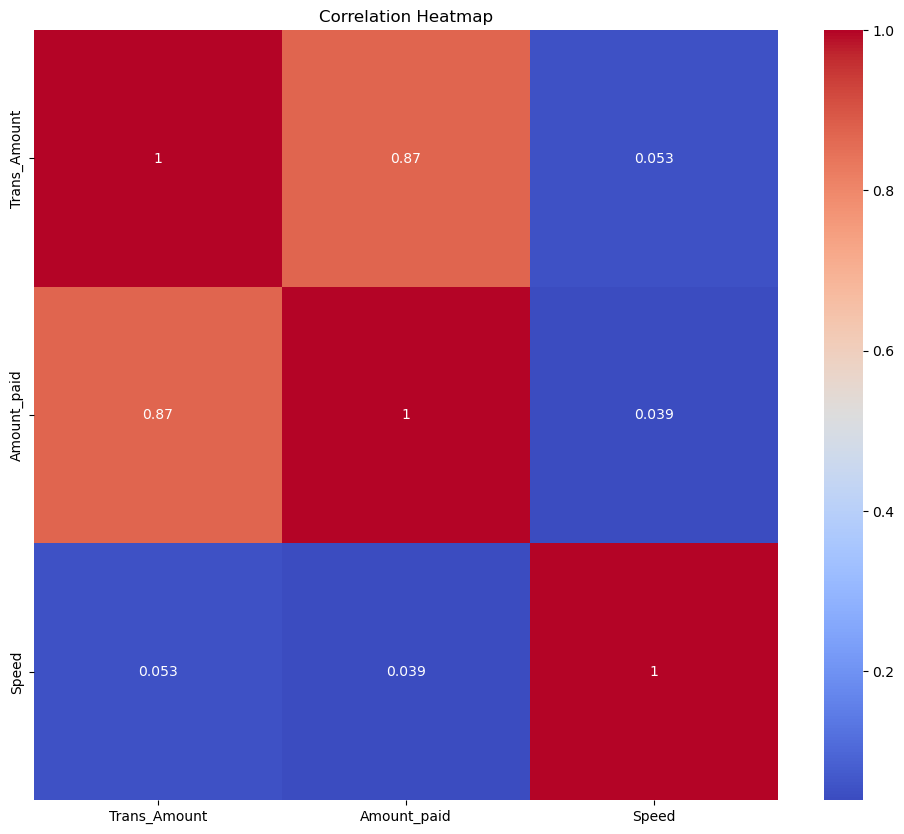

In [43]:
# Calculating correlation matrix for numerical columns only
numerical_df = df.select_dtypes(include=['int64', 'float64'])
corr_matrix = numerical_df.corr()



plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## One-Hot Encoding

In [44]:
df.head()

,Time,Veh_Type,TollBoothID,Lane_Type,Veh_Dimensions,Trans_Amount,Amount_paid,Geo_location,Speed,Fraud_indicator,Hour,DayOfWeek,Month
0,2023-01-06 11:20:00,Bus,A-101,Express,Large,350,120,"13.059816123454882, 77.77068662374292",65,Fraud,11,4,1
1,2023-01-07 14:55:00,Car,B-102,Regular,Small,120,100,"13.059816123454882, 77.77068662374292",78,Fraud,14,5,1
2,2023-01-08 18:25:00,Motorcycle,D-104,Regular,Small,0,0,"13.059816123454882, 77.77068662374292",53,Not Fraud,18,6,1
3,2023-01-09 02:05:00,Truck,C-103,Regular,Large,350,120,"13.059816123454882, 77.77068662374292",92,Fraud,2,0,1
4,2023-01-10 06:35:00,Van,B-102,Express,Medium,140,100,"13.059816123454882, 77.77068662374292",60,Fraud,6,1,1


In [45]:
df_encoded = pd.get_dummies(df, columns=['Veh_Type', 'TollBoothID', 'Lane_Type', 'Veh_Dimensions', 'Geo_location'])


### Checking the data types 

In [46]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Time                                                5000 non-null   datetime64[ns]
 1   Trans_Amount                                        5000 non-null   int64         
 2   Amount_paid                                         5000 non-null   int64         
 3   Speed                                               5000 non-null   int64         
 4   Fraud_indicator                                     5000 non-null   object        
 5   Hour                                                5000 non-null   int32         
 6   DayOfWeek                                           5000 non-null   int32         
 7   Month                                               5000 non-null   int32         
 8   Veh_Type

### Changing into integers

In [55]:
import warnings

# Filter out future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Label Encoding

In [53]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['Fraud_indicator'] = label_encoder.fit_transform(df_encoded['Fraud_indicator'])


In [47]:
bool_cols = [col for col in df_encoded if df_encoded[col].dtype == 'bool']
df_encoded[bool_cols] = df_encoded[bool_cols].astype(int)


In [71]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                                              Non-Null Count  Dtype
---  ------                                              --------------  -----
 0   Trans_Amount                                        5000 non-null   int64
 1   Amount_paid                                         5000 non-null   int64
 2   Speed                                               5000 non-null   int64
 3   Fraud_indicator                                     5000 non-null   int64
 4   Hour                                                5000 non-null   int32
 5   DayOfWeek                                           5000 non-null   int32
 6   Month                                               5000 non-null   int32
 7   Veh_Type_Bus                                        5000 non-null   int32
 8   Veh_Type_Car                                        5000 non-null   int32
 9   Veh_Type_Motorcycle

In [72]:
df_encoded.head()

,Trans_Amount,Amount_paid,Speed,Fraud_indicator,Hour,DayOfWeek,Month,Veh_Type_Bus,Veh_Type_Car,Veh_Type_Motorcycle,...,Lane_Type_Express,Lane_Type_Regular,Veh_Dimensions_Large,Veh_Dimensions_Medium,Veh_Dimensions_Small,"Geo_location_12.84197701525119, 77.67547528176169","Geo_location_12.936687032945434, 77.53113977439017","Geo_location_13.042660878688794, 77.47580097259879","Geo_location_13.059816123454882, 77.77068662374292","Geo_location_13.21331620748757, 77.55413526894684"
0,350,120,65,0,11,4,1,1,0,0,...,1,0,1,0,0,0,0,0,1,0
1,120,100,78,0,14,5,1,0,1,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,53,1,18,6,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,350,120,92,0,2,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,140,100,60,0,6,1,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0


## Save ready data

In [ ]:
df_cleaned.to_csv("ready_data.csv", index=False)

In [75]:
x = df_encoded.drop(columns='Fraud_indicator', axis=1)

x

,Trans_Amount,Amount_paid,Speed,Hour,DayOfWeek,Month,Veh_Type_Bus,Veh_Type_Car,Veh_Type_Motorcycle,Veh_Type_SUV,...,Lane_Type_Express,Lane_Type_Regular,Veh_Dimensions_Large,Veh_Dimensions_Medium,Veh_Dimensions_Small,"Geo_location_12.84197701525119, 77.67547528176169","Geo_location_12.936687032945434, 77.53113977439017","Geo_location_13.042660878688794, 77.47580097259879","Geo_location_13.059816123454882, 77.77068662374292","Geo_location_13.21331620748757, 77.55413526894684"
0,350,120,65,11,4,1,1,0,0,0,...,1,0,1,0,0,0,0,0,1,0
1,120,100,78,14,5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
2,0,0,53,18,6,1,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
3,350,120,92,2,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,140,100,60,6,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,330,330,81,22,6,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
4996,125,125,64,13,1,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
4997,115,115,93,5,6,2,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
4998,145,145,57,20,0,2,0,0,0,1,...,1,0,1,0,0,0,0,0,0,1


In [76]:
y = df_encoded['Fraud_indicator']

y

0       0
1       0
2       1
3       0
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    0
Name: Fraud_indicator, Length: 5000, dtype: int64